# Bilimsel Programlamaya Kolay Başlangıç

Bilimsel Programlamaya Kolay Başlangıç gibi bir seri oluşturma fikri, öğrencilerin bir problemi çözmek için yaklaşım geliştirmekte ne  kadar zorlandıklarını gördükten sonra kafamda oluşmaya başladı. Veri Defteri'nde belli bir konuyu açıklamayı hedefleyen birçok faydalı yazı var, ama benim amacım, programlamayı _araç_ olarak kullanmak; seri boyunca gitgide karmaşıklaşan problemleri buna uygun programlama araçlarıyla çözmek.


Bilimsel Programlama denilince akla şu ara yapay zeka, makine öğrenmesi gibi afili konular geliyor, ama aslında bilimsel programlama bazen bundan çok daha fazlası ve _genellikle de_ çok daha azı. Aslında istediğimiz şey, basit ya da karmaşık bir problemi bilgisayar aracılığıyla çözülebilir hale getirmek, problemi bilgisayara çözdürmek ve sonuçları anlayıp değerlendirmekten ibaret.


Bilimsel Programlama her disiplin için farklı şeyler ifade etse de, öğrencilerden araştırmacılara birçokları için temel birkaç adımdan oluşuyor:
1. Hazırlık (Sabitleri başlatma, gerekirse veri yapılarını oluşturma vb.)
2. Hesaplama
3. Sonuçları Görselleştirme

  
Olan biteni daha net anlatabilmek için son derece basit, lise seviyesinde bir problemi ele alalım: Serbest Düşüş Hareketi.

Problemin matematiksel modeli bu kadarcık:   
*Konum değişimi:*  
$ h(t) = h(t_0) - \frac{1}{2} g t^2 $  
*Hız değişimi:*   
$ v(t) = v(t_0) - g t $  

Parametreler ise şöyle:  
$h = $  yükseklik ($m$)   
$v = $  hız ($m/s$)   
$g = $  kütleçekimi sabiti (Dünya için 9.81 $m/s^2$)  
$t = $  zaman  ($s$)  
$h(t_0) = $  başlangıçtaki yükseklik ($m$)   
$v(t_0) = $  başlangıçtaki hız ($m/s$)  

Bu yazıda sadece yukarıdaki formül ile "gerçek" değerler üzerinden ilerleyeceğiz, sonraki yazıda ise yatay atış hareketi ve bunun sayısal yöntemlerle modellenmesi konusunda değineceğiz. Amacımız, başlangıçtan itibaren 10 saniye içinde düşen cismin yükseklik değişiminin grafiğini çizebilmek. Bunun için 1 saniye aralıkla yüksekliği hesaplayacağız.

İlk adım olarak, hazırlık aşamasında yerçekimi sabitini ve çıktı alacağımız zaman listesi ile daha sonra dolduracağımız konum ve hız listelerini oluşturuyoruz:

In [9]:
# sonradan gerekecek kütüphanelerini çağır
import matplotlib.pyplot as plt

# Kütleçekimi Sabiti [m/s^2]
gDünya = 9.81

# bitiş zamanı (sn)
tSon = 10 
# adım büyüklüğü (sn)
tAdım = 0.5


# başlangıç zamanı, irtifa ve hız
t0 = 0 
h0 = 0
v0 = 0

# Zaman, yükseklik ve hız listelerini oluştur
tList = []
hListDünya = []
vListDünya = []

Bahsettiğimiz 3 adımdan Hazırlık kısmını hallettiğimize göre, Hesaplama adımına geçmek için işin matematiğine yakından bakabiliriz. Her adımda yukarıda verdiğimiz formülün sonucunu tekrar tekrar hesaplıyoruz ve değişen tek şey sadece zaman. O halde hesaplama mekanizmasını bir kere kurup sonra gerektikçe tekrar çalıştırabiliriz.  

Bu işi yapmanın iki yöntemi var:
1. Karmaşık işler için eski usül "fonksiyon" tanımlama (hatırlatma için [buraya](http://www.veridefteri.com/2018/01/06/python-programlamaya-giris-fonksiyonlar/) ve [buraya](http://www.veridefteri.com/2018/01/10/python-programlamaya-giris-fonksiyon-parametreleri/) bakabilirsiniz.)
2. Basit sayılabilecek işler için _lambda_ mekanizması (hatırlatma için [buraya](http://www.veridefteri.com/2018/01/19/python-programlamaya-giris-isimsiz-fonksiyonlar/) bakabilirsiniz) 

İkisini de gösterecek örneklere bakalım; konumu eski usül fonksiyonla, hızı da lambda ile hesaplayalım:

In [10]:
# Normal inline method
def h(t, h0=0, g=gDünya):
    """Verilen bir t zamanı için irtifayı döndürür ($ h(t) = h_0 - \frac{1}{2} g t^2 $)"""
    return h0 + (-1/2 * g * t**2)

# Lambda method
v = lambda t, vy0=0, g=gDünya: vy0 + ( -g*t )
#    """Verilen bir t zamanı için hızı döndürür ($ v(t) = v_0 - g t $)"""

Sözdizimini uzun uzun anlatmayacağım. Özetle, konum fonksiyonuna _hedef zaman, başlangıç konumu ve kütleçekimi ivmesini_ veriyoruz; eğer bir şey vermezsek başlangıç konumunu sıfır ve kütleçekimi ivmesini de Dünya olarak almasını tembihliyoruz. Benzer şekilde hız fonksiyonuna da _hedef zaman, başlangıç konumu ve kütleçekimi ivmesini_ veriyoruz; eğer bir şey vermezsek başlangıç hızını sıfır ve kütleçekimi ivmesini de yine Dünya olarak almasını sağlıyoruz. 

Üç tırnak ile fonksiyonlara açıklama koyduğumuz da dikkatinizi çeksin. Bu kadar basit bir örnekte o kadar gerekli olmayabilir, ama emin olun karmaşık bir fonksiyonun ne yaptığını, hangi parametreleri hangi birimde aldığını altı ay sonra hatırlamayacaksınız. Yazdığınız kodu başkası kullanacaksa, bu açıklamaları yazmazsanız yiyeceğiniz küfür de cabası. Bunların hepsi iyi alışkanlıklar.

Fonksiyonlarımızı zaten daha önce hazırlamıştık, tek yapmamız gereken başlangıçtan bitiş zamanına dek her zaman adımı için bunları tekrar tekrar çağırmak ve bulduğumuz değerleri en başta oluşturduğumuz boş listelere eklemek:

In [11]:
t = t0 
while t<=tSon:
    hListDünya.append( h(t, h0) )
    vListDünya.append( v(t, v0) )
    tList.append(t)
    t += tAdım

# Zaman listesinin ilk 3 elemanını ekrana bas
print(tList[:3])
# Yükseklik listesinin ilk 3 elemanını ekrana bas
print(hListDünya[:3])
# Hız listesinin ilk 3 elemanını ekrana bas
print(vListDünya[:3])

[0, 0.5, 1.0]
[0.0, -1.22625, -4.905]
[0.0, -4.905, -9.81]


Ekrana zaman, konum ve hızın ilk 3 değerini bastık. Birinci saniyede konumun -4.905 m , hızın da -9.81 m/s olması iyiye işaret, yukarıda formülden de bunun doğruluğunu kontrol edebiliriz. Görünen o ki fonksiyonlarımız iyi çalışıyor. Bu tür küçük testleri yapmak, daha da iyisi bunları minik _birim testleri (unit test)_ olarak kodunuza eklemek yarın bir gün bir şeyler çalışmadığında hatanın nerede olduğunu, ya da en azından nerede _olmadığını_ anlamanızda size çok yardımcı olacaktır.   

Her bir zaman adımı için hesaplamayı yaparken `t` zaman sayacını ilerlettiğimize de dikkat edin. Bu zaman sayacı sayesinde `tSon` değerini geçtiğimizde döngüden çıkıyoruz.

Son adım olan Sonuçları Görselleştirme'de ise ekrana güzel bir grafik basıyoruz ($\LaTeX$ formatında yazılmış formüle dikkat). İlk grafikte zaman listesi ile aynı büyüklükte ve her bir zamana karşılık gelen konum listesini de grafik komutuna yolluyoruz. İkinci grafik de benzer şekilde zaman ve hız listelerinden grafiği oluşturuyor.

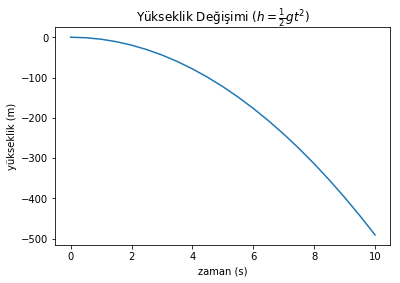

In [12]:
# Yükseklik grafiği
plt.plot( tList , hListDünya)

plt.title(r"Yükseklik Değişimi ($ h = \frac{1}{2} g t^2 $)")
plt.xlabel("zaman (s)")
plt.ylabel("yükseklik (m)")

plt.show()

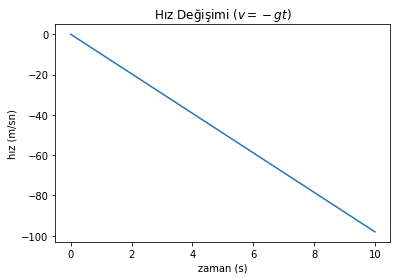

In [13]:
# Hız grafiği
plt.plot( tList , vListDünya)

plt.title(r"Hız Değişimi ($ v = -gt $)")
plt.xlabel("zaman (s)")
plt.ylabel("hız (m/sn)")

plt.show()

Jupyter defterleri ve grafiklerin içindeki $\LaTeX$ formülleri ilginizi çektiyse [buradan](http://data-blog.udacity.com/posts/2016/10/latex-primer/) daha fazla bilgi edinebilirsiniz.

Buraya kadar her şey güzel ve basit - bilimsel programlamanın yukarıda bahsettiğim üç temel adımını da uygulamış olduk. Bu problemi çözmek için daha başka yöntemler de uygulamak elbette mümkün. Sonuçta programlamada her yiğidin bir yoğurt yiyişi olduğu doğru. Önemli olan, daha zorlu problemler karşımıza çıktıkça daha farklı yöntemleri de kullanabilmek. 

O halde yazıyı bitirmeden önce işleri biraz daha eğlenceli hale getirelim ve Dünya ile Ay'daki serbest düşmeyi kıyaslayalım. Altyapıyı (fonksiyonlarımızı) iyi hazırladığımız için bunu yapmak gayet kolay.

Yapılması gereken ilk iş hazırlık kısmına Ay'ı eklemek ve zaman listesinin yanı sıra boş konum ve hız listelerini oluşturmak. Konum ve hız listelerini hem Dünya hem de Ay için ayrı ayrı oluşturmamız gerekiyor. Ancak zaman listesi ikisi için de ortak.

In [14]:
# Kütleçekimi Sabiti [m/s^2]
gDünya = 9.81
gAy  = 1.625 

# bitiş zamanı (sn)
tSon = 10 
# adım büyüklüğü (sn)
tAdım = 0.5


# başlangıç zamanı, irtifa ve hız
t0 = 0 
h0 = 0
v0 = 0

# Zaman, yükseklik ve hız listelerini oluştur
tList = []
hListDünya = []
vListDünya = []
hListAy = []
vListAy = []

Döngüyü her bir zaman adımı için çalıştırıp bu kez hem Ay hem de Dünya için konum ve hız verilerini dolduruyoruz. Ayrıca, varsayılan değer olarak Dünya kütleçekimi katsayısını değil, hem Ay hem de Dünya için başta belirlediğimiz kütleçekimi katsayısı değerlerini fonksiyona yolluyoruz.

In [15]:
t = t0 
while t<=tSon:
    hListDünya.append( h(t, h0, gDünya) )
    vListDünya.append( v(t, v0, gDünya) )
    
    hListAy.append( h(t, h0, gAy) )
    vListAy.append( v(t, v0, gAy) )
    
    tList.append(t)
    t += tAdım

Bu örnekte grafikleri birazcık süsleyeceğiz. Hem Ay hem de Dünya için grafikleri üstüste basarak karşılaştıracağız. Bunu yaparken Ay ve Dünya için veri etiketlerini `legend` kullanarak grafiğe ekleyeceğiz.

Bunun yanı sıra `subplot` yapısıyla konum ve hız grafiklerinin zamanı ortak eksen olarak kullanan yekpare bir grafik olarak çalışmasını sağlayacağız. Bu tür ikili veya dörtlü grafik gruplarını makalelerde sıklıkla görebilirsiniz.

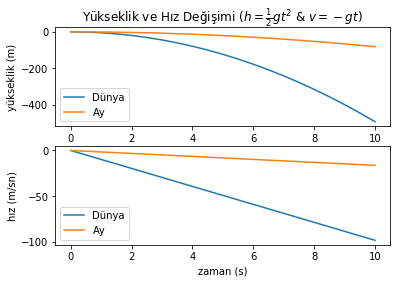

In [16]:
# Yükseklik grafiği
plt.subplot(211)
plt.plot( tList , hListDünya, label="Dünya")
plt.plot( tList , hListAy, label="Ay")

plt.title(r"Yükseklik ve Hız Değişimi ($ h = \frac{1}{2} g t^2 $ & $ v = -gt $)")
plt.xlabel("zaman (s)")
plt.ylabel('yükseklik (m)')
plt.legend(loc=3)

# Hız grafiği
plt.subplot(212)
plt.plot( tList , vListDünya, label="Dünya")
plt.plot( tList , vListAy, label="Ay")

plt.xlabel("zaman (s)")
plt.ylabel("hız (m/sn)")
plt.legend(loc=3)

plt.show()

Bu örneğimizde saf Python kullandık, henüz `numpy` gibi daha eğlenceli ve yetenekli yapılara girmedik. Ancak temel döngüler, veri görselleştirme, fonksiyonlar ve bilimsel programlamanın temellerine umuyorum ki kolay bir başlangıç yapmış olduk. 

Bu yazıyı çalıştırılabilir bir Jupyter defteri halinde, yazıdaki iki örneğin kodlarıyla birlikte GitHub sayfamızda bulabilirsiniz.